In [1]:
# importing libraries that will be used throughout the code
import numpy as np  # mathematical essentials
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.linear_model import LinearRegression    # Linear regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer

In [2]:
import pandas as pd

file = pd.read_excel('/Users/USER/Documents/Hult/MBAN/Machine Learning/Mobile_App_Survey_Data')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/USER/Documents/Hult/MBAN/Machine Learning/Mobile_App_Survey_Data'

In [2]:
# loading data
got = pd.read_excel('/Users/USER/Documents/Hult/MBAN/Machine Learning/GOT_character_predictions.xlsx')

#Used to analyze data from original source and start prelimenary analysis 
#got.tail(n=10)
#got.describe()
#got.info()

#Creating a copy so as not to change original
got_copy = pd.DataFrame.copy(got)

# the following code makes the new DataFrame independent
got_OLS_df = pd.DataFrame.copy(got_copy)

#Updating data types so some of the models can run properly
got_update_types = got_OLS_df.astype({"book1_A_Game_Of_Thrones":float, "book2_A_Clash_Of_Kings":float,
                 "book3_A_Storm_Of_Swords":float,"book4_A_Feast_For_Crows":float,
                 "book5_A_Dance_with_Dragons":float,"isMarried":float,"isNoble":float})

#checking to see what columns have full data
#got_OLS.isnull().sum(axis = 0)
got_update_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   float64
 11  book2_A_Clash_Of_Kings      1946 non-null   float64
 12  book3_A_Storm_Of_Swords     1946 non-null   float64
 13  book4_A_Feast_For_Crows     1946 

In [3]:
# Step 1: INSTANTIATE a model object, dropped Book 1
lm_best = smf.ols(formula = """isAlive ~   book5_A_Dance_with_Dragons+
                                           book2_A_Clash_Of_Kings+
                                           book3_A_Storm_Of_Swords+
                                           book4_A_Feast_For_Crows+
                                           isMarried+
                                           isNoble+
                                           numDeadRelations+
                                           popularity""",
                                           data = got_update_types)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                isAlive   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     37.13
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           3.55e-55
Time:                        20:14:34   Log-Likelihood:                -1004.8
No. Observations:                1946   AIC:                             2028.
Df Residuals:                    1937   BIC:                             2078.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

After checking the first model's results, I decided to pick specific columns with lower p-values, drop book1_A_Game_Of_Thrones, and seperate the response variable from the rest of the data. In this case, I chose the isAlive column as my y-variable. 

In [4]:
# declaring set of x-variables, removing high p-values from above model
x_variables = ['book5_A_Dance_with_Dragons',  
               'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows',
                'isNoble',
                'popularity']

# Preparing a DataFrame 
ols_got   = got_update_types.loc[ : , x_variables]


# Preparing the target variable
ols_got_target = got_OLS_df.loc[ : , 'isAlive']


# OLS dataset and target variable
x_train, x_test, y_train, y_test = train_test_split(
            ols_got,  # x-variables
            ols_got_target,   # y-variable
            test_size = 0.10,
            random_state = 219,
            stratify = ols_got_target)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape[0]}
""")


Training Data
-------------
X-side: (1751, 5)
y-side: 1751


Testing Data
------------
X-side: (195, 5)
y-side: 195



In [5]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test)


# SCORING the results
print('OLS Training Score :', lr.score(x_train, y_train).round(4))
print('OLS Testing Score  :', lr.score(x_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train, y_train).round(4) # using R-square
lr_test_score  = lr.score(x_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.1126
OLS Testing Score  : 0.2232
OLS Train-Test Gap : 0.1106


In [6]:
#Creating a copy dataframe to use for new model so as not to change previous model's data
got_copy = pd.DataFrame.copy(got_update_types)

# the following code makes the new DataFrame independent
got_df = pd.DataFrame.copy(got_copy)

#Updating data types
got_update = got_df.astype({"book1_A_Game_Of_Thrones":float, "book2_A_Clash_Of_Kings":float,
                 "book3_A_Storm_Of_Swords":float,"book4_A_Feast_For_Crows":float,
                 "book5_A_Dance_with_Dragons":float,"isMarried":float,"isNoble":float})

#Dropping unused features, target variable, Book5
got_knn = got_update.drop(['S.No', 'name', 'title',  'culture', 'dateOfBirth',
                           'mother', 'father', 'heir', 'house', 'spouse', 
                           'book5_A_Dance_with_Dragons', 'isAliveMother', 
                           'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
                           'age', 'isAlive'],
                             axis = 1)

#Setting target variable
got_knn_target = got_df.loc[:,'isAlive']

#got_knn.info()

In [7]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(got_knn)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(got_knn)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.50,-0.77,-0.96,-1.20,-0.41,-0.92,-0.22,-0.56
25%,-0.50,-0.77,-0.96,-1.20,-0.41,-0.92,-0.22,-0.47
50%,-0.50,-0.77,-0.96,0.83,-0.41,-0.92,-0.22,-0.35
75%,-0.50,1.29,1.04,0.83,-0.41,1.08,-0.22,-0.02
max,2.01,1.29,1.04,0.83,2.46,1.08,10.62,5.67


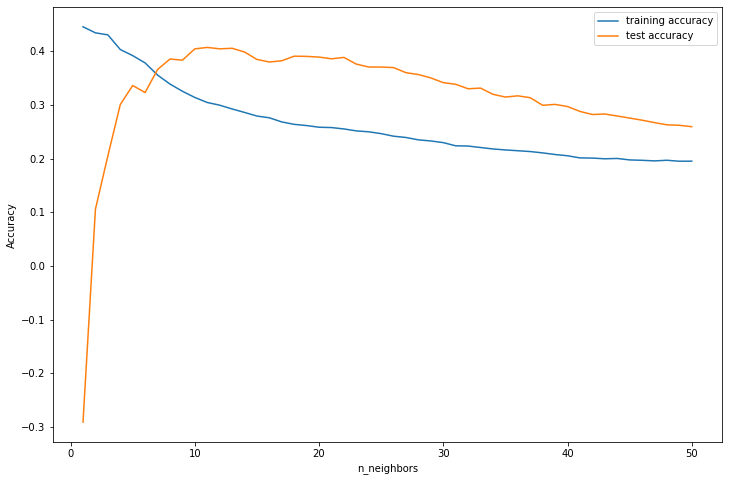

The optimal number of neighbors is 11


In [8]:
# Splitting the data for visual
x_train_STAND, x_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            x_scaled_df,
            got_knn_target,
            test_size = 0.10,
            random_state = 219,
            stratify = got_knn_target)

# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test_STAND, y_test_STAND))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy,     label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [9]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1

# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm   = 'auto',
                              n_neighbors = opt_neighbors)


# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(x_train, y_train)

# PREDITCING on new data
knn_opt_pred = knn_opt_fit.predict(x_test)

# SCORING the results
print('KNN Training Score:', knn_opt.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_opt.score(x_test, y_test).round(4))

# saving scoring data for future use
knn_opt_score_train = knn_opt.score(x_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(x_test, y_test).round(4)

# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_opt_score_train - knn_opt_score_test).round(4))
knn_opt_test_gap = abs(knn_opt_score_train - knn_opt_score_test).round(4)

KNN Training Score: 0.2848
KNN Testing Score : 0.3129
KNN Train-Test Gap: 0.0281


In [10]:
########################################
# optimal_neighbors
########################################
x_data = got_knn
y_data = got_knn_target

def optimal_neighbors(got_knn,
                      got_knn_target,
                      standardize = True,
                      pct_test=0.10,
                      seed=219,
                      stratify = got_knn_target,
                      response_type='reg',
                      max_neighbors=11,
                      show_viz=True):
 
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1

In [11]:
#Splitting data for next regression model
x_train_STAND, x_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            x_data,
            y_data,
            test_size = 0.10,
            random_state = 219,
            stratify = y_data)

# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7556
LogReg Testing  ACCURACY: 0.7846
LogReg Train-Test Gap   : 0.029


In [12]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


In [13]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.5931


In [14]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8669
Full Tree Testing ACCURACY : 0.7692
Full Tree AUC Score: 0.6941


In [15]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


In [16]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 2,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

In [17]:
#unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


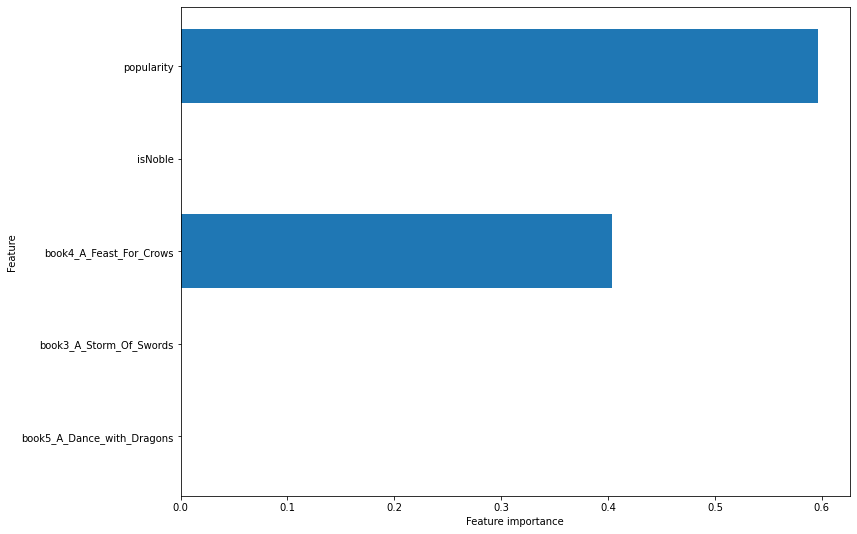

In [18]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')
        
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

In [19]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values from code above
lr_tuned = LogisticRegression(C            = 0.6,
                              warm_start   = True,
                              solver       = 'newton-cg',
                              max_iter     = 500,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(x_train, y_train) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                        y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7544
LR Tuned Testing  ACCURACY: 0.7846
LR Tuned AUC Score        : 0.5931


In [20]:
#unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


In [21]:
# comparing results
print(f"""
Model           AUC      Training Acc.   Testing Acc.   TN, FP, FN, TP
-----         --------   ------------   -------------   --------------  
Logistic      {lr_tuned_auc}       {lr_tuned_train_score}          {lr_tuned_test_score}      {lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}
Full Tree     {full_tree_auc_score}       { full_tree_train_score}          {full_tree_test_score}      {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree*  {pruned_tree_auc_score}       {pruned_tree_train_score}          {pruned_tree_test_score}      {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}

*This is my final model
""")
 
  


Model           AUC      Training Acc.   Testing Acc.   TN, FP, FN, TP
-----         --------   ------------   -------------   --------------  
Logistic      0.5931       0.7544          0.7846      (10, 40, 2, 143)
Full Tree     0.6941       0.8669          0.7692      (27, 23, 22, 123)
Pruned Tree*  0.7721       0.7744          0.8462      (31, 19, 11, 134)

*This is my final model

